# Analyzing Global Temperatures

This project analyzes local temperature trends to overall global temperature trends.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
ldf = pd.read_csv('data/sandiegotemp.csv')
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   avg_temp  165 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


In [30]:
ldf

,year,avg_temp
0,1849,16.03
1,1850,15.55
2,1851,15.66
3,1852,16.06
4,1853,16.69
...,...,...
160,2009,17.03
161,2010,16.19
162,2011,16.26
163,2012,17.20


In [31]:
gdf = pd.read_csv('data/globaltemp.csv')
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [32]:
gdf=gdf.loc[gdf['year']>1848]
gdf= gdf.loc[gdf['year']<2014]
gdf

,year,avg_temp
99,1849,7.98
100,1850,7.90
101,1851,8.18
102,1852,8.10
103,1853,8.04
...,...,...
259,2009,9.51
260,2010,9.70
261,2011,9.52
262,2012,9.51


In [33]:
gdf.describe()

,year,avg_temp
count,165.000000,165.000000
mean,1931.000000,8.554545
std,47.775517,0.460165
min,1849.000000,7.560000
25%,1890.000000,8.190000
50%,1931.000000,8.530000
75%,1972.000000,8.770000
max,2013.000000,9.730000


In [34]:
ldf.describe()

,year,avg_temp
count,165.000000,165.000000
mean,1931.000000,16.126364
std,47.775517,0.546219
min,1849.000000,14.660000
25%,1890.000000,15.740000
50%,1931.000000,16.120000
75%,1972.000000,16.460000
max,2013.000000,17.460000


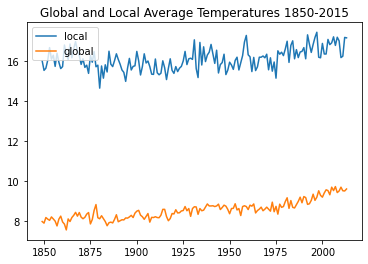

In [35]:
from cProfile import label

from matplotlib.pyplot import legend


#plt.figure(figsize=(14,10))
plt.title('Global and Local Average Temperatures 1850-2015')
plt.plot(ldf['year'], ldf['avg_temp'], label='San Diego Temperatures')
plt.plot(gdf['year'], gdf['avg_temp'], label='Global Temperatures')
plt.legend(('local', 'global'), loc='upper left')

In [36]:
gdf['10 year MA']=gdf.avg_temp.rolling(10).mean()
gdf

,year,avg_temp,10 year MA
99,1849,7.98,NaN
100,1850,7.90,NaN
101,1851,8.18,NaN
102,1852,8.10,NaN
103,1853,8.04,NaN
...,...,...,...
259,2009,9.51,9.493
260,2010,9.70,9.543
261,2011,9.52,9.554
262,2012,9.51,9.548


In [37]:
ldf['10 year MA']=ldf.avg_temp.rolling(10).mean()
ldf

,year,avg_temp,10 year MA
0,1849,16.03,NaN
1,1850,15.55,NaN
2,1851,15.66,NaN
3,1852,16.06,NaN
4,1853,16.69,NaN
...,...,...,...
160,2009,17.03,16.878
161,2010,16.19,16.807
162,2011,16.26,16.796
163,2012,17.20,16.879


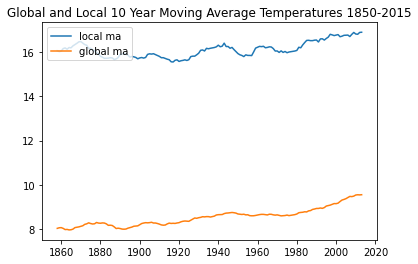

In [38]:
#plt.figure(figsize=(14,10))
plt.title('Global and Local 10 Year Moving Average Temperatures 1850-2015')
plt.plot(ldf['year'], ldf['10 year MA'], label='San Diego MA Temperatures')
plt.plot(gdf['year'], gdf['10 year MA'], label='Global MA Temperatures')
plt.legend(('local ma', 'global ma'), loc='upper left')

Highest Temperature minus Lowest Temperature: City and Global

In [39]:
round(gdf['avg_temp'].max() - gdf['avg_temp'].min(), 3)

2.17

In [40]:
round(ldf['avg_temp'].max() - ldf['avg_temp'].min(), 3)

2.8

### Change in Temperature
2013 Average Temperatures minus 1849 Average Temperatures

In [41]:
g13=gdf.loc[gdf['year']==2013]


In [42]:
g49=gdf.loc[gdf['year']==1849]


In [43]:
round(g13.iloc[0]['avg_temp'] - g49.iloc[0]['avg_temp'], 3)

1.63

In [44]:
l13=ldf.loc[ldf['year']==2013]
l13

,year,avg_temp,10 year MA
164,2013,17.18,16.887


In [45]:
l49=ldf.loc[ldf['year']==1849]
l49

,year,avg_temp,10 year MA
0,1849,16.03,NaN


In [46]:
round(l13.iloc[0]['avg_temp'] - l49.iloc[0]['avg_temp'], 3)

1.15

### Line of Best Fit

In [47]:
a, b = np.polyfit(gdf['year'], gdf['avg_temp'], 1)

Text(0.5, 1.0, 'Global Temperature: Line of Best Fit')

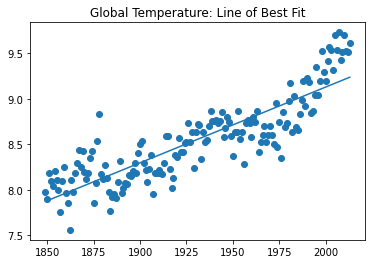

In [48]:
plt.scatter(gdf['year'], gdf['avg_temp'])
plt.plot(gdf['year'], a*gdf['year']+b)
plt.title('Global Temperature: Line of Best Fit')

In [49]:
round(a, 4)

0.0083

In [50]:
c, d = np.polyfit(ldf['year'], ldf['avg_temp'], 1)

Text(0.5, 1.0, 'San Diego Temperature: Line of Best Fit')

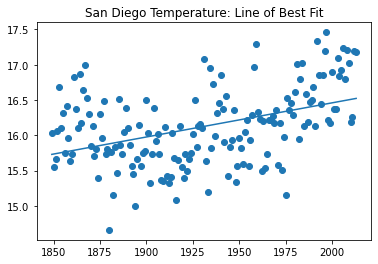

In [51]:
plt.scatter(ldf['year'], ldf['avg_temp'])
plt.plot(ldf['year'], c*ldf['year']+d)
plt.title('San Diego Temperature: Line of Best Fit')

In [52]:
round(c, 4)

0.0048